T1:41.086041677852805
Tn:16.515484070307714


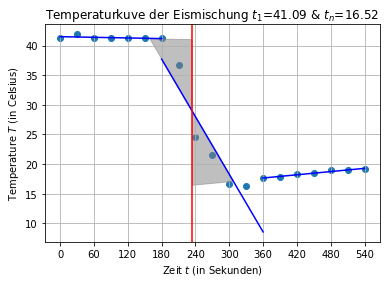

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
#vor :7 zugabe 7:12 nach 12:
y=np.array([41.3,41.9,41.3,41.2,41.2,41.2,41.3,36.7,24.5,21.5,16.7,16.3,17.6,17.8,18.3,18.5,19,19,19.1])
err=np.full((len(y)-1),0.1)
x=np.arange(start=0,stop=(len(y)-1)*30+1,step=30)
v= stats.linregress(x[:7], y[:7])
z= stats.linregress(x[7:12], y[7:12])
n= stats.linregress(x[12:], y[12:])
plt.scatter(x,y)
def line(x,m,b):
    return m*x+b

def area(t):
    x1=abs((v[1]-z[1]) / (v[0]-z[0]))
    x2=t
    x3=t
    y1=line(x1,v[0],v[1])
    y2=line(t,v[0],v[1])
    y3=line(t,z[0],z[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area1 = abs(np.sum(c))/2
    x1=abs((n[1]-z[1]) / (n[0]-z[0]))
    x2=t
    x3=t
    y1=line(x1,n[0],n[1])
    y2=line(t,n[0],n[1])
    y3=line(t,z[0],z[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area2 = abs(np.sum(c))/2
    return abs(area1-area2)
res = optimize.minimize_scalar(area).x


plt.plot(x[:7],line(x[0:7],v[0],v[1]),color="blue")
plt.plot(x[6:13],line(x[6:13],z[0],z[1]),color="blue")
plt.plot(x[12:],line(x[12:],n[0],n[1]),color="blue")
plt.grid()
plt.ylabel(r'Temperature $T$ (in Celsius)')
plt.xlabel(r'Zeit $t$ (in Sekunden)')
plt.xticks(np.arange(start=0,stop=(len(y)-1)*30+1,step=60))
#plt.scatter(x[7:],y[7:])
plt.title("Temperaturkuve der Eismischung $t_1$={:.2f} & $t_n$={:.2f}".format(line(res,v[0],v[1]),line(res,n[0],n[1])))

plt.axvline(x=res,color="red")

print(f"T1:{line(res,v[0],v[1])}")
print(f"Tn:{line(res,n[0],n[1])}")

low= abs((v[1]-z[1]) / (v[0]-z[0]))
high= abs((n[1]-z[1]) / (n[0]-z[0]))
x = np.arange(low,res,1)

y1 =x*v[0]+v[1]
y2 =x*z[0]+z[1]
y3 =x*n[0]+n[1]


plt.fill_between(x,y1,y2,color='grey',alpha='0.5')

x = np.arange(res,high,1)
y1 =x*v[0]+v[1]
y2 =x*z[0]+z[1]
y3 =x*n[0]+n[1]

plt.fill_between(x,y2,y3,color='grey',alpha='0.5')

plt.savefig("eis.png")